In [1]:
import torch
import pandas as pd

In [2]:
data = torch.load('aml_datasets/Small-HI/processed/data.pt')
ports = torch.load('aml_datasets/Small-HI/processed/ports.pt')
formatted = pd.read_csv('aml_datasets/formatted_transactions.csv')

In [16]:
formatted

,EdgeID,from_id,to_id,Timestamp,Amount Sent,Sent Currency,Amount Received,Received Currency,Payment Format,Is Laundering
0,1827,3225,3225,-345590,3.490000e+00,2,3.490000e+00,2,3,0
1,2453,4321,4321,-345590,3.462677e+05,2,3.462677e+05,2,3,0
2,2686,4744,4745,-345590,4.151570e+03,2,4.151570e+03,2,2,0
3,4205,7381,7382,-345590,2.169124e+09,11,2.169124e+09,11,4,0
4,4309,7561,7562,-345590,2.866420e+03,2,2.866420e+03,2,2,0
...,...,...,...,...,...,...,...,...,...,...
99995,53360,75404,75405,818170,1.567634e+04,2,1.567634e+04,2,1,1
99996,62301,84951,84951,822490,6.259100e+04,14,1.108492e+04,2,1,0
99997,13057,22007,22008,828610,1.414157e+04,8,1.414157e+04,8,1,1
99998,97793,117636,82828,832450,5.681730e+03,2,5.681730e+03,2,1,1


In [27]:

ports['train'][0][0][0]

tensor(0.)

In [3]:
train_data = data['train']
val_data = data['val']
test_data = data['test']

# Access node attributes
train_node_attr = train_data['node'].x
val_node_attr = val_data['node'].x
test_node_attr = test_data['node'].x

In [7]:
train_data[('node', 'to', 'node')].edge_index.unique().size()

torch.Size([86171])

In [31]:
#train_y = train_data[('node', 'rev_to', 'node')].y
train_edge_index = train_data[('node', 'rev_to', 'node')].edge_index
train_edge_attr = train_data[('node', 'rev_to', 'node')].edge_attr

train_edge_index

tensor([[  3225,   4321,   4745,  ..., 101360, 101535,  76184],
        [  3225,   4321,   4744,  ..., 101359,  30443, 115792]])

In [14]:
train_data[('node', 'rev_to', 'node')].edge_attr

tensor([[-1.1913, -0.0200, -0.5039,  0.7679],
        [-1.1913, -0.0184, -0.5039,  0.7679],
        [-1.1913, -0.0200, -0.5039,  0.1598],
        ...,
        [ 1.8665, -0.0200,  0.0285,  0.1598],
        [ 1.8665, -0.0200,  0.8270,  0.1598],
        [ 1.8665, -0.0200, -0.7701, -0.4483]])

In [32]:
train_data[('node', 'to', 'node')].edge_attr

tensor([[-1.1913, -0.0200, -0.5039,  0.7679],
        [-1.1913, -0.0184, -0.5039,  0.7679],
        [-1.1913, -0.0200, -0.5039,  0.1598],
        ...,
        [ 1.8665, -0.0200,  0.0285,  0.1598],
        [ 1.8665, -0.0200,  0.8270,  0.1598],
        [ 1.8665, -0.0200, -0.7701, -0.4483]])

In [47]:
train_node_attr.unique()

tensor([1.])

In [48]:
train_y = train_data[('node', 'to', 'node')].y
train_edge_index = train_data[('node', 'to', 'node')].edge_index
train_edge_attr = train_data[('node', 'to', 'node')].edge_attr

In [50]:
train_y.unique()

tensor([0, 1])

In [42]:
train_edge_attr

tensor([[-1.1913, -0.0200, -0.5039,  0.7679],
        [-1.1913, -0.0184, -0.5039,  0.7679],
        [-1.1913, -0.0200, -0.5039,  0.1598],
        ...,
        [ 1.8665, -0.0200,  0.0285,  0.1598],
        [ 1.8665, -0.0200,  0.8270,  0.1598],
        [ 1.8665, -0.0200, -0.7701, -0.4483]])

In [43]:
train_timestamps = train_data[('node', 'to', 'node')].timestamps
train_split_mask = train_data[('node', 'to', 'node')].split_mask

In [45]:
train_timestamps

tensor([     0.,      0.,      0.,  ..., 518340., 518340., 518340.])

In [ ]:
data = torch.load('data_small.pt')

{'train': HeteroData(
   node={
     x=[705907, 1],
     num_nodes=705907,
   },
   (node, to, node)={
     edge_index=[2, 4432934],
     edge_attr=[4432934, 4],
     y=[4432934],
     timestamps=[4432934],
     split_mask=[4432934],
   },
   (node, rev_to, node)={
     edge_index=[2, 4432934],
     edge_attr=[4432934, 4],
   }
 ),
 'val': HeteroData(
   node={
     x=[705907, 1],
     num_nodes=705907,
   },
   (node, to, node)={
     edge_index=[2, 5749376],
     edge_attr=[5749376, 4],
     y=[5749376],
     timestamps=[5749376],
     split_mask=[5749376],
   },
   (node, rev_to, node)={
     edge_index=[2, 5749376],
     edge_attr=[5749376, 4],
   }
 ),
 'test': HeteroData(
   node={
     x=[705907, 1],
     num_nodes=705907,
   },
   (node, to, node)={
     edge_index=[2, 6924049],
     edge_attr=[6924049, 4],
     y=[6924049],
     timestamps=[6924049],
     split_mask=[6924049],
   },
   (node, rev_to, node)={
     edge_index=[2, 6924049],
     edge_attr=[6924049, 4],
   }
 )}

In [34]:
train_data = data['train']
val_data = data['val']
test_data = data['test']


In [37]:
train_data[('node', 'to', 'node')].edge_attr

tensor([[-1.1880, -0.0027, -0.7434, -0.6675],
        [-1.1880, -0.0029, -0.7434, -1.2658],
        [-1.1880, -0.0030, -0.7434,  0.5292],
        ...,
        [ 1.8746, -0.0030, -0.2666,  2.3242],
        [ 1.8746, -0.0030, -0.2666,  2.3242],
        [ 1.8746, -0.0030, -0.2666,  2.3242]])

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('aml_datasets/Hi-Small_Trans.csv')

In [3]:
data.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [4]:
len(data['From Bank'].unique())

5335

In [5]:
len(data['To Bank'].unique())

2613

In [ ]:
def bank_metadata(data,DatasetName):
    all_banks = list(set(data['From Bank'].unique()).union(set(data['To Bank'].unique()))) #Get all unique banks
    in_degree = []
    out_degree = []
    transactions_amount = []
    in_degree_sum = []
    out_degree_sum = []
    transactions_sum = []

    for bank in all_banks: 
        bank_data = data[(data['From Bank']==bank) | (data['To Bank']==bank)]
        trans_to =  bank_data[bank_data['To Bank']==bank].shape[0] #Basically the in-degree
        trans_from = bank_data[bank_data['From Bank']==bank].shape[0] #Basically the out-degree
        trans_total = bank_data.shape[0] #Total amount of transactions through that bank 
        trans_to_sum = bank_data[bank_data['To Bank']==bank]['Amount Received'].sum() #Money received at the bank 
        trans_from_sum = bank_data[bank_data['From Bank']==bank]['Amount Paid'].sum() # Money send from the bank 
        trans_sum = trans_to_sum + trans_from_sum

        #Append calculated data to the lists generated:
        in_degree.append(trans_to)
        out_degree.append(trans_from)
        transactions_amount.append(trans_total)
        in_degree_sum.append(trans_to_sum)
        out_degree_sum.append(trans_from_sum)
        transactions_sum.append(trans_sum)
        
    all_data = pd.DataFrame({
        'Bank_id' : all_banks,
        'in_degree' : in_degree,
        'out_degree' : out_degree,
        'transaction_count' : transactions_amount,
        'in_degree_sum' : in_degree_sum,
        'out_degree_sum': out_degree_sum,
        'transaction_sum': transactions_sum        
    })

    #Plotting - All the plots 
    # List of columns to plot
    columns_to_plot = ['in_degree', 'out_degree', 'transaction_count', 'in_degree_sum', 'out_degree_sum', 'transaction_sum']

    # Plotting the distributions
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    fig.suptitle(f'Log-Scaled Distribution of banks in dataset {DatasetName}')

 
    for ax, column in zip(axes.flatten(), columns_to_plot):
        n, bins, patches = ax.hist(all_data[column], bins=20, edgecolor='k', log=True)
        ax.set_title(f'Log-Scaled Distribution of {column} ')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'bank_analysis/{DatasetName}_bank_figure.png')


    return all_data

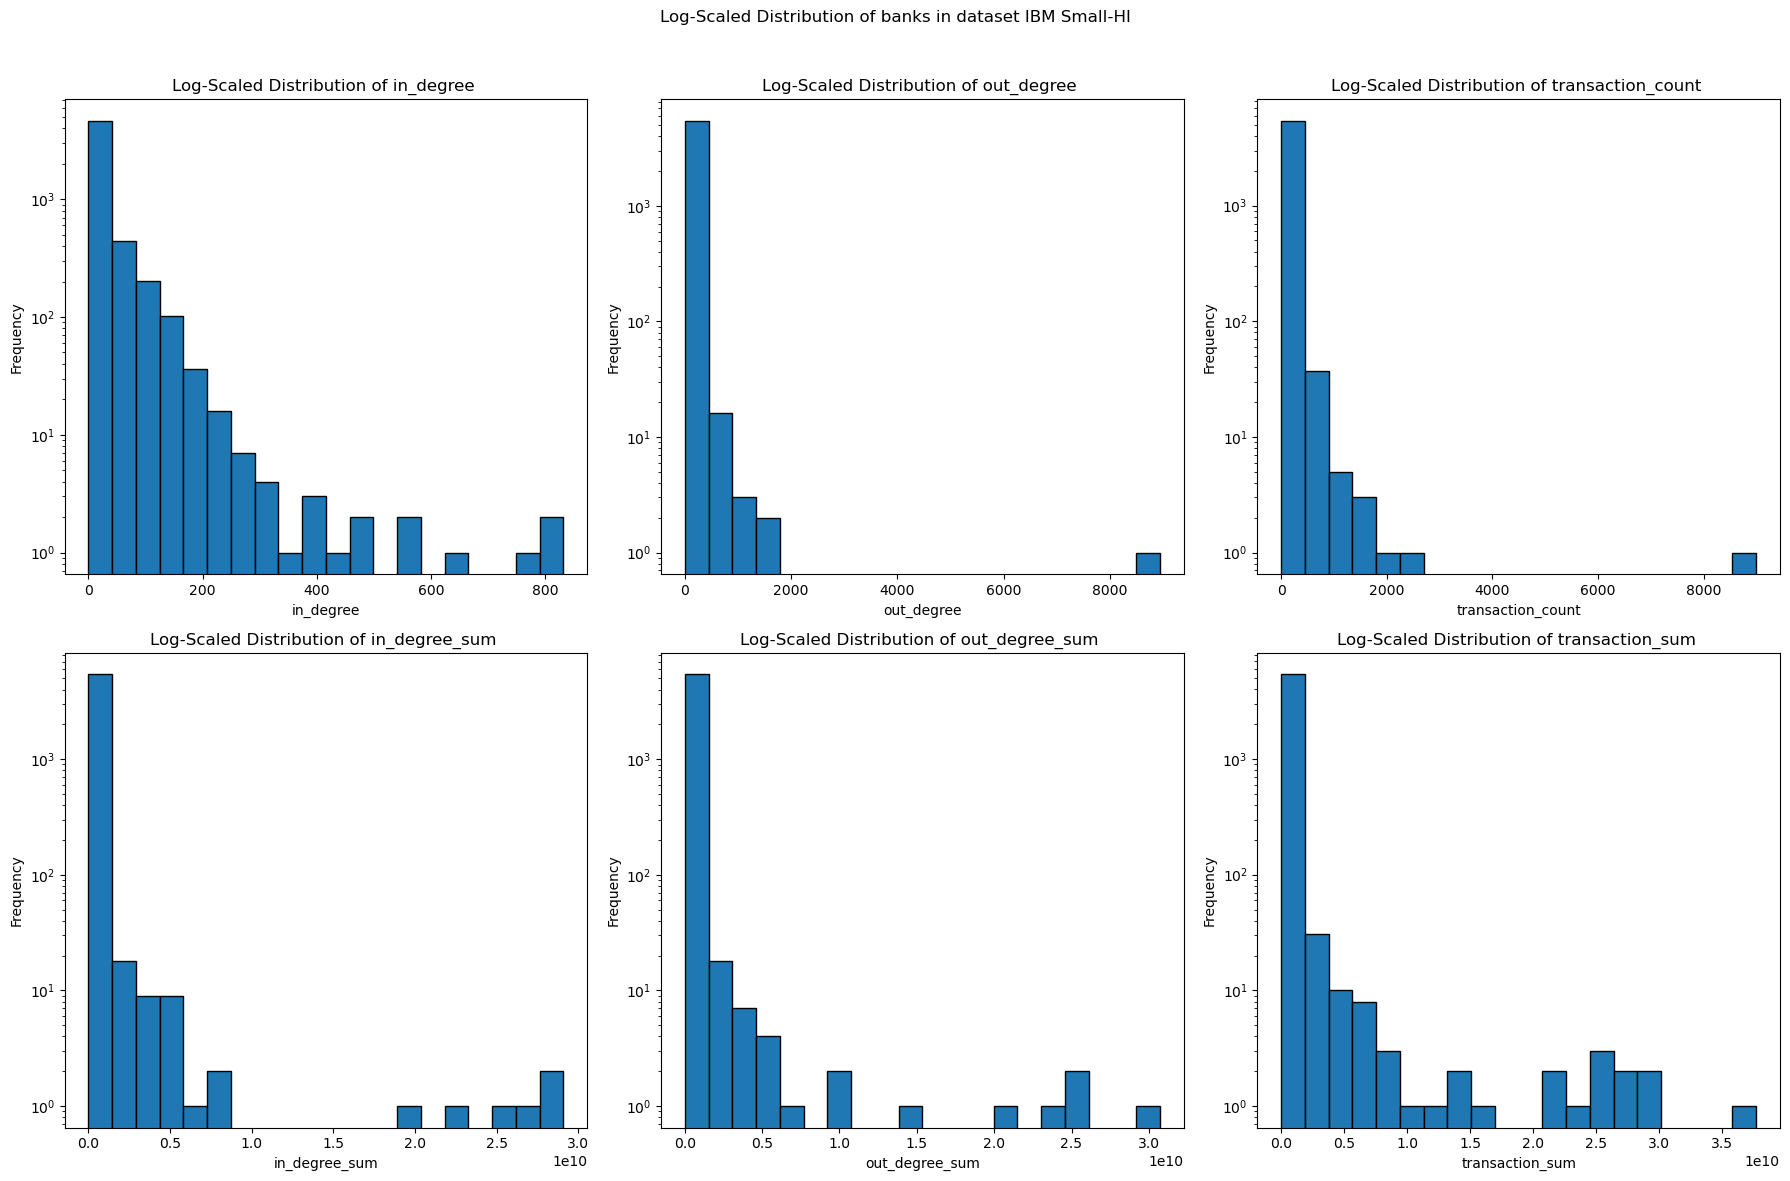

In [23]:
all_data = bank_metadata(data, 'IBM Small-HI')

In [96]:
all_data

,Bank_id,in_degree,out_degree,transaction_count,in_degree_sum,out_degree_sum,transaction_sum
0,16384,5,2,6,2275919.17,1228991.09,3504910.26
1,1,626,1223,1717,340839171.63,311704894.94,652544066.57
2,32769,1,1,1,1496.73,1496.73,2993.46
3,3,566,791,1191,2280373109.94,3753258207.16,6033631317.10
4,4,349,426,713,1014095165.90,1514639800.44,2528734966.34
...,...,...,...,...,...,...,...
5454,49142,4,1,5,819974.09,2314.41,822288.50
5455,344055,0,1,1,0.00,0.13,0.13
5456,327670,0,1,1,0.00,287.45,287.45
5457,327675,1,1,1,2640.43,2640.43,5280.86


In [3]:

def bank_metadata(data, DatasetName):
    all_data = data.groupby('Bank').agg(
        in_degree=pd.NamedAgg(column='To Bank', aggfunc='size'),
        out_degree=pd.NamedAgg(column='From Bank', aggfunc='size'),
        transaction_count=pd.NamedAgg(column='From Bank', aggfunc='count'),
        in_degree_sum=pd.NamedAgg(column='Amount Received', aggfunc='sum'),
        out_degree_sum=pd.NamedAgg(column='Amount Paid', aggfunc='sum'),
        transaction_sum=pd.NamedAgg(column='Amount Paid', aggfunc='sum')
    ).reset_index()

    # Plotting - All the plots
    columns_to_plot = ['in_degree', 'out_degree', 'transaction_count', 'in_degree_sum', 'out_degree_sum', 'transaction_sum']

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    fig.suptitle(f'Log-Scaled Distribution of banks in dataset {DatasetName}')

    for ax, column in zip(axes.flatten(), columns_to_plot):
        n, bins, patches = ax.hist(all_data[column], bins=20, edgecolor='k', log=True)
        ax.set_title(f'Log-Scaled Distribution of {column} ')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'bank_analysis/{DatasetName}_bank_figure.png')

    return all_data


In [5]:
bank_metadata(data, 'AML_Small_LI')

KeyError: 'Bank'